# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [1]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

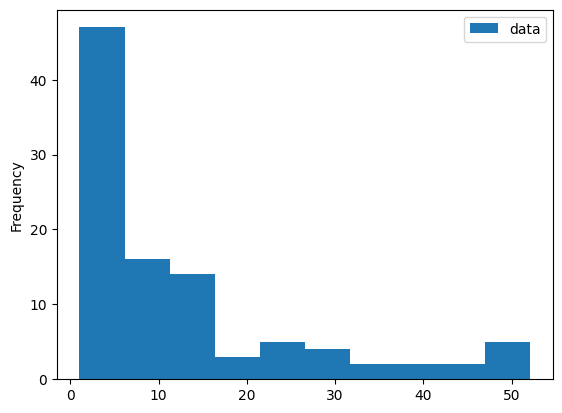

In [2]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

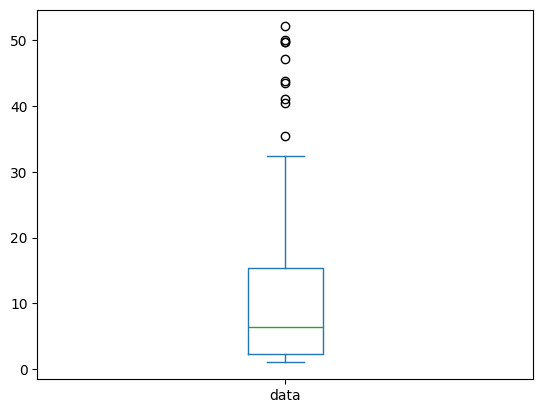

In [3]:
df.plot.box()

The second visualization clearly shows the disturbution. You can easily see where the different quartiles are, as well as the median and the outliers. Both graphs display the obvious skew present. In the first viusualization, you can see frequency which isn't shown in the boxplot. Both graphs could use descriptive titles and labeling. For the boxplot you can make the outliers red so they stand out more. 

I think the boxplot reprsents this data better than the other graph since it shows which drugs are more expensive in comparison to the other ones. 

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

/tmp/ipykernel_2715/1557943851.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Category', palette='viridis')


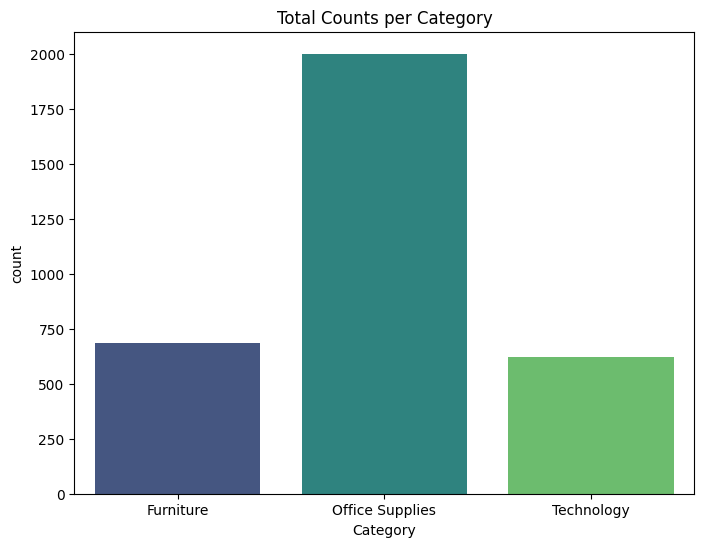

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/workspaces/Module-B-semester-2/E-commerce data', encoding='latin1')

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Category', palette='viridis')
plt.title('Total Counts per Category')
plt.show()

In [7]:
# Select numerical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in num_cols:
    print(f"--- Statistics for {col} ---")
    print(f"Mean:   {df[col].mean():.2f}")
    print(f"Median: {df[col].median():.2f}")
    print(f"Mode:   {df[col].mode()[0]:.2f}\n")

--- Statistics for Row ID ---
Mean:   5087.11
Median: 5183.50
Mode:   13.00

--- Statistics for Postal Code ---
Mean:   56186.52
Median: 60472.50
Mode:   10035.00

--- Statistics for Sales ---
Mean:   221.38
Median: 53.81
Mode:   12.96

--- Statistics for Quantity ---
Mean:   3.77
Median: 3.00
Mode:   2.00

--- Statistics for Discount ---
Mean:   0.16
Median: 0.20
Mode:   0.00

--- Statistics for Profit ---
Mean:   28.21
Median: 8.30
Mode:   0.00



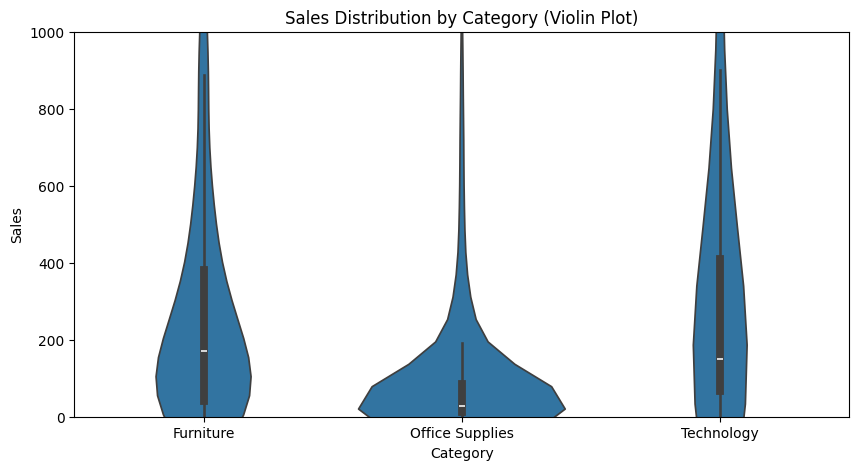

In [8]:
plt.figure(figsize=(10, 5))
sns.violinplot(x='Category', y='Sales', data=df)
plt.title('Sales Distribution by Category (Violin Plot)')
plt.ylim(0, 1000)
plt.show()

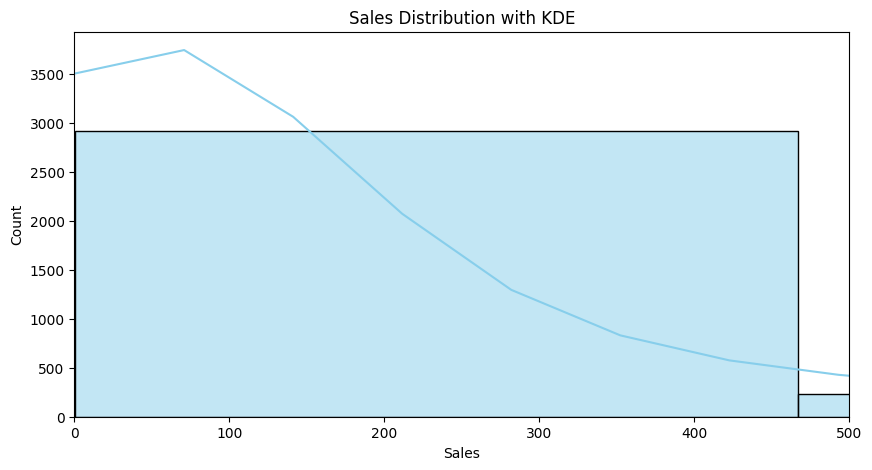

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Sales'], kde=True, color='skyblue', bins=30)
plt.title('Sales Distribution with KDE')
plt.xlim(0, 500) 
plt.show()

Conclusions:

1. When you make the bins very narrow, you see every tiny fluctuation and gap in the data. On the other hand, when you make the bins very wide, you are looking at the data and "smoothing it out". You might miss the fact that there are actually two distinct groups of prices but it is excellent for seeing the overall skew. 
2. There are clear and significant outliers present in this dataset, particularly in the Sales and Profit columns. This is made apparent by the large gap between the Mean (average) and the Median (middle value). In particular the sales column has a high positive skew. The mean is over 4 times higher than the median. This tells us that while the "typical" order is only about $54, there are a few massive orders (thousands of dollars) dragging the average up. These high-value orders are our outliers. For previous assignemnts, we that this is because of the some orders that had to do with copying machines which are typically very expensive. 

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

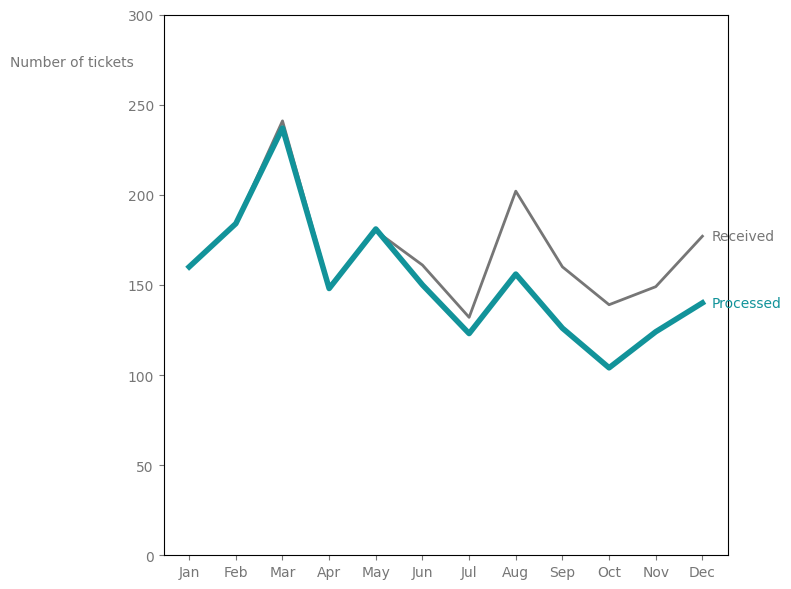

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
received = [160, 184, 241, 149, 180, 161, 132, 202, 160, 139, 149, 177]
processed = [160, 184, 237, 148, 181, 150, 123, 156, 126, 104, 124, 140]

gray = '#767676'
blue = '#12939A'
light_gray = '#BFBFBF'

plt.figure(figsize=(8, 6))

plt.plot(months, received, color=gray, linewidth=2, label='Ticket Received')
plt.plot(months, processed, color=blue, linewidth=4, label='Ticket Processed')

plt.text(11.2, received[-1], 'Received', color=gray, va='center')
plt.text(11.2, processed[-1], 'Processed', color=blue, va='center')


plt.tick_params(axis='both', colors=gray)
plt.yticks([0, 50, 100, 150, 200, 250, 300])
plt.ylim(0, 300)

plt.ylabel('Number of tickets', color=gray, rotation=0, labelpad=40, y=0.9)

plt.tight_layout()
